In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
corona_df = pd.read_csv("owid-covid-data.csv")

In [16]:
corona_Jan = corona_df[corona_df["date"]=="2021-01-30"]

In [21]:
len(corona_Jan)

191

In [25]:
corona_Jan

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
341,AFG,Asia,Afghanistan,2021-01-30,55008.0,69.0,64.143,2400.0,1.0,3.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498
669,ALB,Europe,Albania,2021-01-30,77251.0,901.0,830.000,1369.0,11.0,8.429,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785
1010,DZA,Africa,Algeria,2021-01-30,107122.0,235.0,250.429,2888.0,4.0,3.857,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754
1345,AND,Europe,Andorra,2021-01-30,9885.0,48.0,55.143,101.0,1.0,0.714,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858
1662,AGO,Africa,Angola,2021-01-30,19782.0,59.0,59.286,464.0,0.0,1.000,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61882,VNM,Asia,Vietnam,2021-01-30,1767.0,110.0,31.286,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694
62257,OWID_WRL,NaN,World,2021-01-30,102016862.0,514596.0,543745.000,2208389.0,13523.0,14070.286,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
62553,YEM,Asia,Yemen,2021-01-30,2120.0,0.0,0.286,615.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
62872,ZMB,Africa,Zambia,2021-01-30,53352.0,1728.0,1251.429,745.0,17.0,16.857,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588


In [26]:
corona_Jan["iso_code"].value_counts().value_counts()

1    190
Name: iso_code, dtype: int64

In [30]:
smoke_cols = []
for col in corona_Jan:
    if "smoke" in col:
        smoke_cols.append(col)

In [31]:
smoke_cols

['female_smokers', 'male_smokers']

In [35]:
corona_Jan[smoke_cols].isnull().sum() / 190

female_smokers    0.257895
male_smokers      0.268421
dtype: float64

In [43]:
len(corona_Jan[smoke_cols].dropna())

140

In [42]:
len(corona_Jan[smoke_cols].dropna()) / 190

0.7368421052631579

In [48]:
corona_df[corona_df["location"]=="South Korea"][smoke_cols].value_counts()

female_smokers  male_smokers
6.2             40.9            376
dtype: int64

In [76]:
country_list = corona_Jan["location"].apply(lambda x : x.upper())

In [77]:
country_list = country_list.to_list()

In [78]:
country_list

['AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'ANDORRA',
 'ANGOLA',
 'ANTIGUA AND BARBUDA',
 'ARGENTINA',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BAHRAIN',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BHUTAN',
 'BOLIVIA',
 'BOSNIA AND HERZEGOVINA',
 'BOTSWANA',
 'BRAZIL',
 'BRUNEI',
 'BULGARIA',
 'BURKINA FASO',
 'BURUNDI',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CAPE VERDE',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COMOROS',
 'CONGO',
 'COSTA RICA',
 "COTE D'IVOIRE",
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'CZECHIA',
 'DEMOCRATIC REPUBLIC OF CONGO',
 'DENMARK',
 'DJIBOUTI',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EL SALVADOR',
 'EQUATORIAL GUINEA',
 'ERITREA',
 'ESTONIA',
 'ESWATINI',
 'ETHIOPIA',
 'FIJI',
 'FINLAND',
 'FRANCE',
 'GABON',
 'GAMBIA',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GREECE',
 'GRENADA',
 'GUATEMALA',
 'GUINEA',
 'GUINEA-BISSAU',
 'GUYANA',
 'HAITI',
 'HONDURAS',
 'HUNGARY

In [71]:
"FRANCE".lower() in country_list

True

In [45]:
corona_Jan[corona_Jan["location"]=="South Korea"][smoke_cols]

,female_smokers,male_smokers
52633,6.2,40.9


In [38]:
corona_df.notnull().sum() / len(corona_df)

iso_code                                 0.994319
continent                                0.988384
location                                 1.000000
date                                     1.000000
total_cases                              0.990600
new_cases                                0.990473
new_cases_smoothed                       0.975297
total_deaths                             0.854471
new_deaths                               0.854439
new_deaths_smoothed                      0.975297
total_cases_per_million                  0.984918
new_cases_per_million                    0.984792
new_cases_smoothed_per_million           0.969695
total_deaths_per_million                 0.848995
new_deaths_per_million                   0.848963
new_deaths_smoothed_per_million          0.969695
reproduction_rate                        0.791818
icu_patients                             0.110967
icu_patients_per_million                 0.110967
hosp_patients                            0.131730


In [6]:
corona_df.isnull().sum()

iso_code                                   359
continent                                  734
location                                     0
date                                         0
total_cases                                594
new_cases                                  602
new_cases_smoothed                        1561
total_deaths                              9196
new_deaths                                9198
new_deaths_smoothed                       1561
total_cases_per_million                    953
new_cases_per_million                      961
new_cases_smoothed_per_million            1915
total_deaths_per_million                  9542
new_deaths_per_million                    9544
new_deaths_smoothed_per_million           1915
reproduction_rate                        13155
icu_patients                             56178
icu_patients_per_million                 56178
hosp_patients                            54866
hosp_patients_per_million                54866
weekly_icu_ad

In [3]:
corona_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63185,ZWE,Africa,Zimbabwe,2021-01-26,32004.0,358.0,475.571,1103.0,28.0,39.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
63186,ZWE,Africa,Zimbabwe,2021-01-27,32304.0,300.0,413.714,1122.0,19.0,34.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
63187,ZWE,Africa,Zimbabwe,2021-01-28,32646.0,342.0,371.286,1160.0,38.0,34.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
63188,ZWE,Africa,Zimbabwe,2021-01-29,32952.0,306.0,347.000,1178.0,18.0,30.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [72]:
oecd_list = pd.read_csv("country.csv")

In [75]:
oecd_list

,location
0,AUSTRALIA
1,AUSTRIA
2,BELGIUM
3,CANADA
4,CHILE
5,COLOMBIA
6,COSTA RICA
7,CZECH REPUBLIC
8,DENMARK
9,ESTONIA


In [79]:
country_list

['AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'ANDORRA',
 'ANGOLA',
 'ANTIGUA AND BARBUDA',
 'ARGENTINA',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BAHRAIN',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BHUTAN',
 'BOLIVIA',
 'BOSNIA AND HERZEGOVINA',
 'BOTSWANA',
 'BRAZIL',
 'BRUNEI',
 'BULGARIA',
 'BURKINA FASO',
 'BURUNDI',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CAPE VERDE',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COMOROS',
 'CONGO',
 'COSTA RICA',
 "COTE D'IVOIRE",
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'CZECHIA',
 'DEMOCRATIC REPUBLIC OF CONGO',
 'DENMARK',
 'DJIBOUTI',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EL SALVADOR',
 'EQUATORIAL GUINEA',
 'ERITREA',
 'ESTONIA',
 'ESWATINI',
 'ETHIOPIA',
 'FIJI',
 'FINLAND',
 'FRANCE',
 'GABON',
 'GAMBIA',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GREECE',
 'GRENADA',
 'GUATEMALA',
 'GUINEA',
 'GUINEA-BISSAU',
 'GUYANA',
 'HAITI',
 'HONDURAS',
 'HUNGARY

In [85]:
corona_Jan.loc[:,"loc_UPPER"] = country_list

In [86]:
oecd_list

,location
0,AUSTRALIA
1,AUSTRIA
2,BELGIUM
3,CANADA
4,CHILE
5,COLOMBIA
6,COSTA RICA
7,CZECH REPUBLIC
8,DENMARK
9,ESTONIA


In [ ]:
for oecd in oecd_list.values.to_list()
corona_Jan[corona_Jan["loc_UPPER"]=="South Korea"]

In [111]:
"ALBANIA" in corona_Jan["loc_UPPER"].to_list()

True

In [112]:
oecd_list = ['AUSTRALIA',
'AUSTRIA',
'BELGIUM',
'CANADA',
'CHILE',
'COLOMBIA',
'COSTA RICA',
'CZECH REPUBLIC',
'DENMARK',
'ESTONIA',
'FINLAND',
'FRANCE',
'GERMANY',
'GREECE',
'HUNGARY',
'ICELAND',
'Ireland',
'Israel',
'Italy',
'Japan',
'Korea',
'Latvia',
'Lithuania',
'Luxembourg',
'Mexico',
'Netherlands',
'New Zealand',
'Norway',
'Poland',
'Portugal',
'Slovak Republic',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Turkey',
'United Kingdom',
'United States'
]

In [113]:
len(oecd_list)

38

In [129]:
# loecd_list = []
# for l in oecd_list:
#     loecd_list.append(l.upper())
# len(loecd_list)

In [131]:
cols_mask = ['location','date',"total_cases",'female_smokers', 'male_smokers']
corona_Jan[corona_Jan["loc_UPPER"].isin(loecd_list)][cols_mask]

,location,date,total_cases,female_smokers,male_smokers
3089,Australia,2021-01-30,28811.0,13.0,16.5
3430,Austria,2021-01-30,413208.0,28.4,30.9
5783,Belgium,2021-01-30,707837.0,25.1,31.4
10416,Canada,2021-01-30,778772.0,12.0,16.6
11716,Chile,2021-01-30,722900.0,34.2,41.5
12422,Colombia,2021-01-30,2086806.0,4.7,13.5
13351,Costa Rica,2021-01-30,193276.0,6.4,17.4
15701,Denmark,2021-01-30,198779.0,19.3,18.8
18680,Estonia,2021-01-30,43747.0,24.5,39.3
20062,Finland,2021-01-30,44871.0,18.3,22.6


In [132]:
corr_mask = ["total_cases",'female_smokers', 'male_smokers']
corr = corona_Jan[corona_Jan["loc_UPPER"].isin(loecd_list)][corr_mask].corr()
corr

,total_cases,female_smokers,male_smokers
total_cases,1.000000,-0.016654,-0.065317
female_smokers,-0.016654,1.000000,0.675132
male_smokers,-0.065317,0.675132,1.000000


In [136]:
import numpy as np

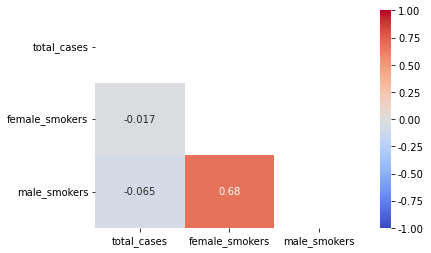

In [141]:
upp_mat = np.triu(corr)

sns.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
plt.show()

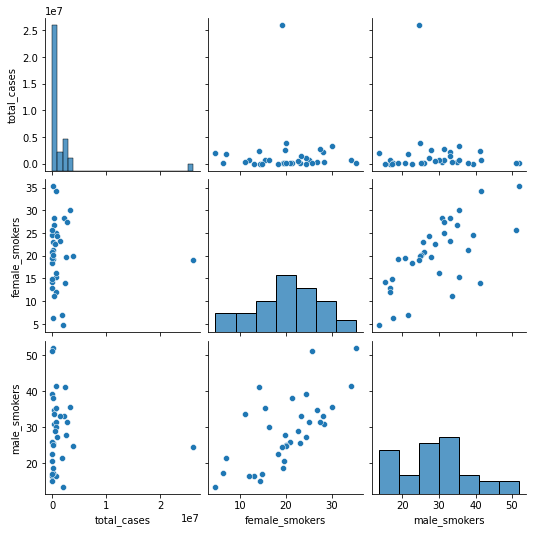

In [134]:
sns.pairplot(corona_Jan[corona_Jan["loc_UPPER"].isin(loecd_list)][corr_mask])
plt.show()

38

,total_cases,female_smokers,male_smokers
3089,28811.0,13.0,16.5
3430,413208.0,28.4,30.9
5783,707837.0,25.1,31.4
10416,778772.0,12.0,16.6
11716,722900.0,34.2,41.5
12422,2086806.0,4.7,13.5
13351,193276.0,6.4,17.4
15701,198779.0,19.3,18.8
18680,43747.0,24.5,39.3
20062,44871.0,18.3,22.6
